# Workflow
1. Load Data
2. Data Preprocessing 
3. EDA      
4. Encode the data
5. Split Data
6. Train and Evaluate Model
7. Test Model
8. HyperParameter Tuning
9. Save model

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

In [1]:
#install and import dependancies
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
import math

In [ ]:
!pip install "numpy == 1.15.0"
!pip install pycaret[full]
from pycaret.classification import setup
from pycaret.classification import compare_models

  Using cached numpy-1.15.0-cp37-cp37m-manylinux1_x86_64.whl (13.8 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.8.0 requires tf-estimator-nightly==2.8.0.dev2021122109, which is not installed.
yellowbrick 1.3.post1 requires numpy<1.20,>=1.16.0, but you have numpy 1.15.0 which is incompatible.
xarray 0.18.2 requires numpy>=1.17, but you have numpy 1.15.0 which is incompatible.
umap-learn 0.5.2 requires numpy>=1.17, but you have numpy 1.15.0 which is incompatible.
tune-sklearn 0.4.1 requires numpy>=1.16, but you have numpy 1.15.0 which is incompatible.
tifffile 2021.11.2 requires numpy>=1.15.1, but you have numpy 1.15.0 which is incompatible.
tensorflow 2.8.0 requires numpy>=1.20, but you have nu

  Using cached numpy-1.21.5-cp37-cp37m-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (15.7 MB)
  Using cached numpy-1.19.5-cp37-cp37m-manylinux2010_x86_64.whl (14.8 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.15.0
    Uninstalling numpy-1.15.0:
      Successfully uninstalled numpy-1.15.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.8.0 requires tf-estimator-nightly==2.8.0.dev2021122109, which is not installed.
tensorflow 2.8.0 requires numpy>=1.20, but you have numpy 1.19.5 which is incompatible.
google-colab 1.0.0 requires ipykernel~=4.10, but you have ipykernel 6.9.1 which is incompatible.
google-colab 1.0.0 requires ipython~=5.5.0, but you have ipython 7.31.1 which is incompatible.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires foliu

/usr/local/lib/python3.7/dist-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


RuntimeError: ignored

RuntimeError: ignored

RuntimeError: ignored

In [2]:
 #Load Data
 from google.colab import files
uploaded = files.upload()

Saving credit_risk_dataset.csv to credit_risk_dataset (1).csv


In [3]:
df = pd.read_csv('credit_risk_dataset.csv')
df.head(5)
#loan status 1 default, 0 gak default

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


# Data Preporcessing

In [ ]:
df.info()
#ada 4 data categorical dan 8 data numerical
#target data loan_status, 1 = default, 0 = gak default

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [ ]:
#cek null data
df.isnull().sum()


person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [4]:
#delete null data
df["person_emp_length"].fillna(df["person_emp_length"].median(), inplace=True)
df["loan_int_rate"].fillna(df["loan_int_rate"].median(), inplace=True)

In [5]:
#cek null data
df.isnull().sum()


person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

In [6]:
df.duplicated().sum()


165

In [6]:
#delete duplicate data
df.drop_duplicates(inplace=True)

In [7]:
# get the numberical variebles
num_cols = pd.DataFrame(df[df.select_dtypes(include=['float', 'int']).columns])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

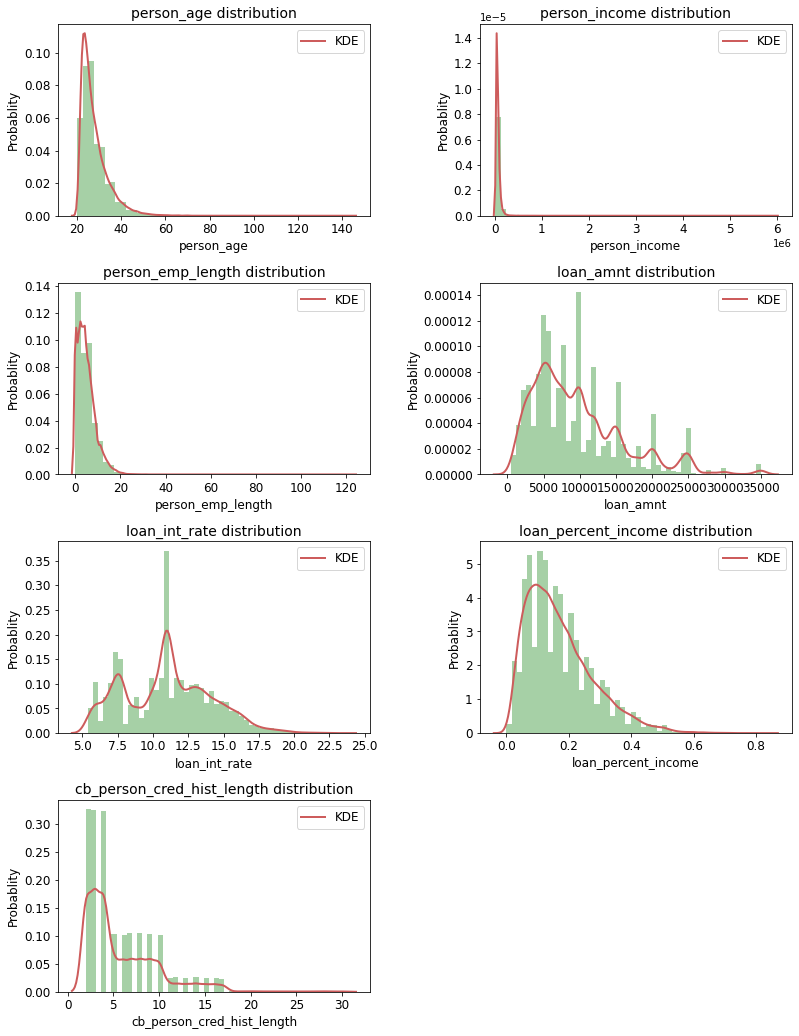

In [8]:
num_cols_hist = num_cols.drop(['loan_status'], axis=1)
# visualize the distribution for each varieble
plt.figure(figsize=(12,16))

for i, col in enumerate(num_cols_hist.columns):
    idx = int('42'+ str(i+1))
    plt.subplot(idx)
    sns.distplot(num_cols_hist[col], color='forestgreen', 
                 kde_kws={'color': 'indianred', 'lw': 2, 'label': 'KDE'})
    plt.title(col+' distribution', fontsize=14)
    plt.ylabel('Probablity', fontsize=12)
    plt.xlabel(col, fontsize=12)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.legend(['KDE'], prop={"size":12})

plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.35,
                    wspace=0.35)
plt.show()
#before removing outlier

In [9]:
 #checking for outlier
def find_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    return df[(df[col] < Q1 - 1.5*IQR) | (df[col] > Q3 + 1.5*IQR)]

In [10]:
likely_to_have_outlier = ["person_age","person_income","person_emp_length","cb_person_cred_hist_length","loan_amnt","loan_int_rate", "loan_percent_income"]
for col in likely_to_have_outlier:
    print(find_outliers(df, col).shape)

(1491, 12)
(1478, 12)
(852, 12)
(1139, 12)
(1679, 12)
(70, 12)
(650, 12)


In [11]:
#function to remove outlier
def remove_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_range = Q1 - 1.5*IQR
    upper_range = Q3 + 1.5*IQR
    df[col] = np.where(df[col]>upper_range, upper_range, df[col])
    df[col] = np.where(df[col]<lower_range, lower_range, df[col])
    return df
#clean the data from outlier
for col in likely_to_have_outlier:
    remove_outliers(df, col)



In [12]:
#get the categorical variable
cat_cols = pd.DataFrame(df[df.select_dtypes(include=['object']).columns])
cat_cols.columns

Index(['person_home_ownership', 'loan_intent', 'loan_grade',
       'cb_person_default_on_file'],
      dtype='object')

In [ ]:
df.describe

<bound method NDFrame.describe of        person_age  ...  cb_person_cred_hist_length
0            22.0  ...                         3.0
1            21.0  ...                         2.0
2            25.0  ...                         3.0
3            23.0  ...                         2.0
4            24.0  ...                         4.0
...           ...  ...                         ...
32576        40.5  ...                        15.5
32577        40.5  ...                        15.5
32578        40.5  ...                        15.5
32579        40.5  ...                        15.5
32580        40.5  ...                        15.5

[32416 rows x 12 columns]>

In [ ]:
df.shape


(32416, 12)

In [13]:
#get the numerical & categorical variable 
#ada 4 data categorical dan 8 data numerical
# get the cleaned numerical variebles
num_cols2 = pd.DataFrame(df[df.select_dtypes(include=['float', 'int']).columns])
# print the numerical variebles
num_cols2.columns

Index(['person_age', 'person_income', 'person_emp_length', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_cred_hist_length'],
      dtype='object')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

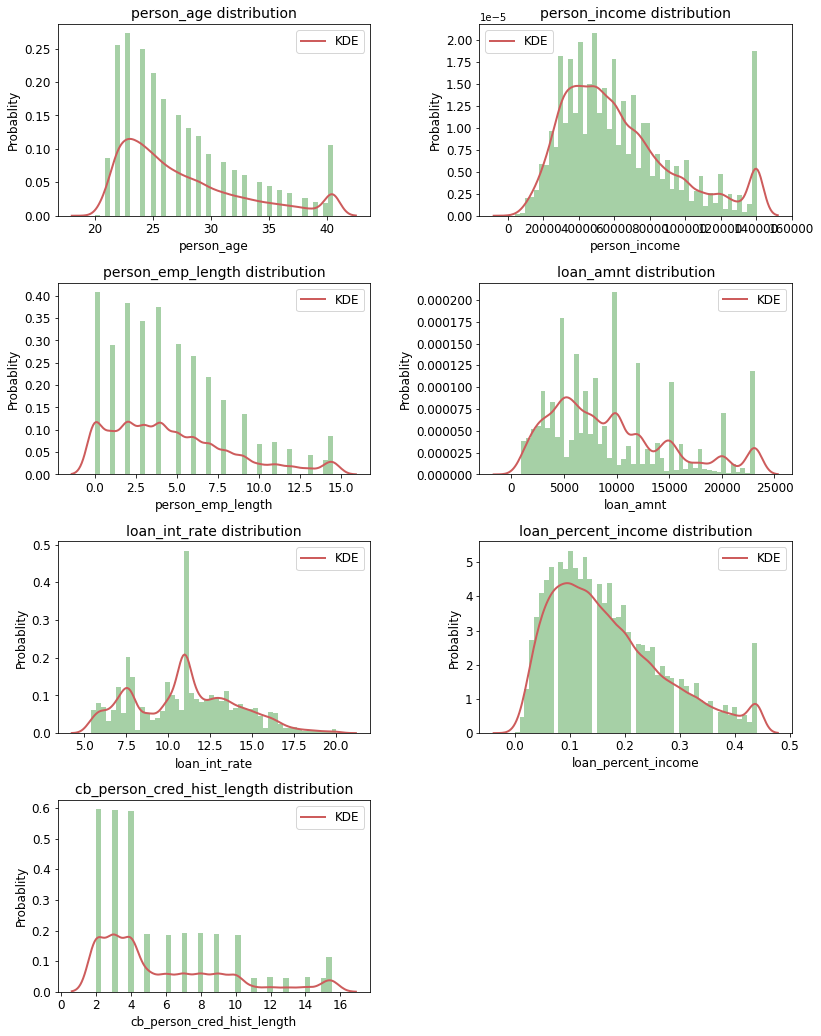

In [14]:
num_cols_hist = num_cols2.drop(['loan_status'], axis=1)
# visualize the distribution for each variable
plt.figure(figsize=(12,16))

for i, col in enumerate(num_cols_hist.columns):
    idx = int('42'+ str(i+1))
    plt.subplot(idx)
    sns.distplot(num_cols_hist[col], color='forestgreen', 
                 kde_kws={'color': 'indianred', 'lw': 2, 'label': 'KDE'})
    plt.title(col+' distribution', fontsize=14)
    plt.ylabel('Probablity', fontsize=12)
    plt.xlabel(col, fontsize=12)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.legend(['KDE'], prop={"size":12})

plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.35,
                    wspace=0.35)
plt.show()
#after removing outlier

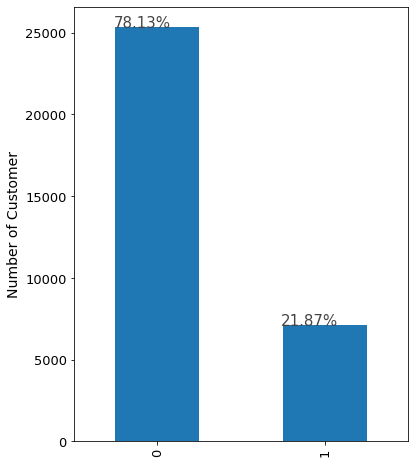

In [17]:
#perbandingan loan status
df['loan_status'].value_counts()
ax = df['loan_status'].value_counts().plot(kind='bar', figsize=(6, 8), fontsize=13)
ax.set_ylabel("Number of Customer", fontsize=14);

totals = []
for i in ax.patches:
    totals.append(i.get_height())

total = sum(totals)

for i in ax.patches:
    ax.text(i.get_x() - .01, i.get_height() + .5, \
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=15,
                color='#444444')
plt.show()

Dataset nya imbalance,
di model pycaret benerin pake SMOTE, fix_imbalance will automaticaaly fix the imbalanced dataset by oversampling using the SMOTE method.

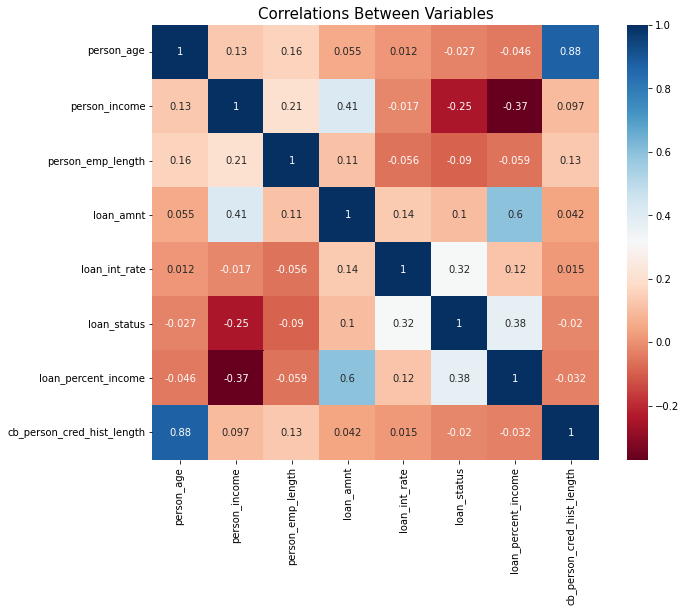

In [18]:
#correlation to loan status 
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap="RdBu")
plt.title("Correlations Between Variables", size=15)
plt.show()

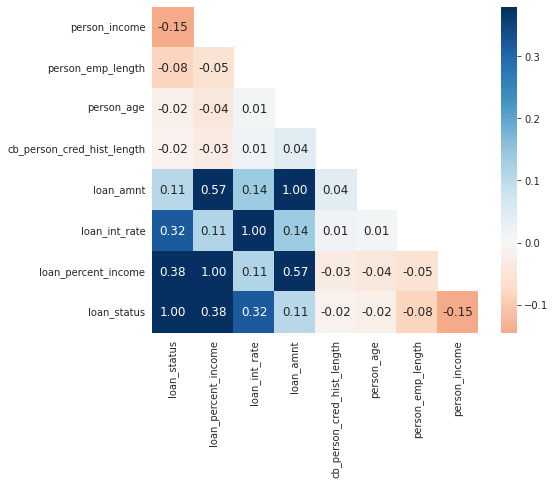

In [19]:
#correlation to loan status
corr = num_cols.corr().sort_values('loan_status', axis=1, ascending=False)
corr = corr.sort_values('loan_status', axis=0, ascending=True)
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, k=1)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(8, 6))
    ax = sns.heatmap(corr, mask=mask, vmin=corr.loan_status.min(), 
                     vmax=corr.drop(['loan_status'], axis=0).loan_status.max(),
                     square=True, annot=True, fmt='.2f',
                     center=0, cmap='RdBu',annot_kws={"size": 12})

In [15]:
!pip install ppscore

In [24]:
import ppscore as pps
pps.score(df, "person_income", "loan_status")

{'baseline_score': 0.2198,
 'case': 'regression',
 'is_valid_score': True,
 'metric': 'mean absolute error',
 'model': DecisionTreeRegressor(),
 'model_score': 0.27394657000980493,
 'ppscore': 0,
 'x': 'person_income',
 'y': 'loan_status'}

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:668: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=4.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:668: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=4.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:668: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=4.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:668: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=4.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:668: UserWarning: The least populated class in 

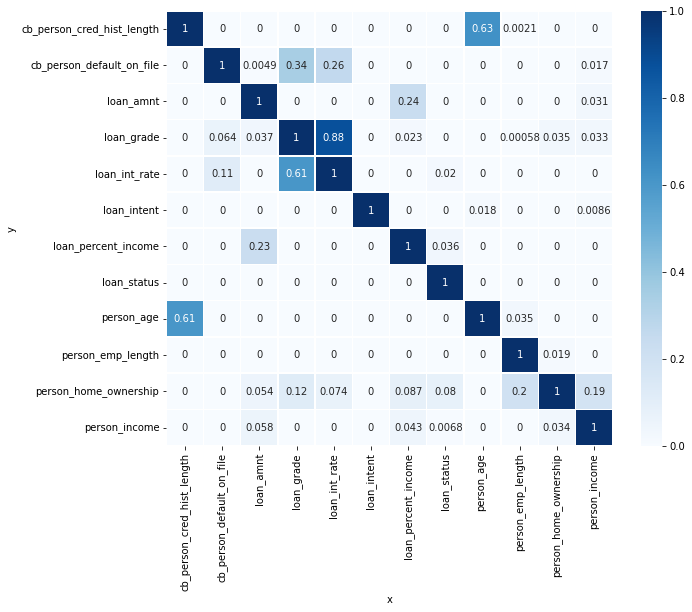

In [26]:
plt.figure(figsize=(10,8))
matrix_df = pps.matrix(df)[['x', 'y', 'ppscore']].pivot(columns='x', index='y', values='ppscore')
sns.heatmap(matrix_df, vmin=0, vmax=1, cmap="Blues", linewidths=0.5, annot=True)

In [21]:
pps.matrix(df)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:668: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=4.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:668: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=4.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:668: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=4.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:668: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=4.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:668: UserWarning: The least populated class in 

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
0,person_age,person_age,1.000000,predict_itself,True,None,0.000000,1.000000,None
1,person_age,person_income,0.000000,regression,True,mean absolute error,24499.979000,24693.702631,DecisionTreeRegressor()
2,person_age,person_home_ownership,0.000000,classification,True,weighted F1,0.437800,0.412976,DecisionTreeClassifier()
3,person_age,person_emp_length,0.000000,regression,True,mean absolute error,2.945900,3.063562,DecisionTreeRegressor()
4,person_age,loan_intent,0.017703,classification,True,weighted F1,0.172200,0.186855,DecisionTreeClassifier()
...,...,...,...,...,...,...,...,...,...
139,cb_person_cred_hist_length,loan_int_rate,0.000000,regression,True,mean absolute error,2.423660,2.444905,DecisionTreeRegressor()
140,cb_person_cred_hist_length,loan_status,0.000000,regression,True,mean absolute error,0.219800,0.343405,DecisionTreeRegressor()
141,cb_person_cred_hist_length,loan_percent_income,0.000000,regression,True,mean absolute error,0.080266,0.082097,DecisionTreeRegressor()
142,cb_person_cred_hist_length,cb_person_default_on_file,0.000000,classification,True,weighted F1,0.735552,0.735552,DecisionTreeClassifier()


In [23]:
pps.matrix(df_clean1)

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
0,person_age,person_age,1.0,predict_itself,True,None,0.00000,1.000000,None
1,person_age,person_income,0.0,regression,True,mean absolute error,24499.97900,24693.702631,DecisionTreeRegressor()
2,person_age,person_emp_length,0.0,regression,True,mean absolute error,2.94590,3.063562,DecisionTreeRegressor()
3,person_age,loan_amnt,0.0,regression,True,mean absolute error,4637.69000,4728.569957,DecisionTreeRegressor()
4,person_age,loan_int_rate,0.0,regression,True,mean absolute error,2.42366,2.450774,DecisionTreeRegressor()
...,...,...,...,...,...,...,...,...,...
724,cb_person_default_on_file_Y,loan_grade_E,0.0,regression,True,mean absolute error,0.02920,0.055640,DecisionTreeRegressor()
725,cb_person_default_on_file_Y,loan_grade_F,0.0,regression,True,mean absolute error,0.00880,0.017396,DecisionTreeRegressor()
726,cb_person_default_on_file_Y,loan_grade_G,0.0,regression,True,mean absolute error,0.00060,0.001215,DecisionTreeRegressor()
727,cb_person_default_on_file_Y,cb_person_default_on_file_N,1.0,regression,True,mean absolute error,0.18240,0.000000,DecisionTreeRegressor()


In [17]:
#encode the data
# one hot encoding categorical variables
num_col3 = df.select_dtypes(exclude = 'object')
char_col = df.select_dtypes(include = 'object')


In [18]:
encoded_char_col = pd.get_dummies(char_col)


In [22]:
df_clean1 = pd.concat([num_col3, encoded_char_col], axis=1)
df_clean1

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_N,cb_person_default_on_file_Y
0,22.0,59000.0,14.5,23125.0,16.02,1,0.44,3.0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1
1,21.0,9600.0,5.0,1000.0,11.14,0,0.10,2.0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0
2,25.0,9600.0,1.0,5500.0,12.87,1,0.44,3.0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
3,23.0,65500.0,4.0,23125.0,15.23,1,0.44,2.0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
4,24.0,54400.0,8.0,23125.0,14.27,1,0.44,4.0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32576,40.5,53000.0,1.0,5800.0,13.16,0,0.11,15.5,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0
32577,40.5,120000.0,4.0,17625.0,7.49,0,0.15,15.5,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0
32578,40.5,76000.0,3.0,23125.0,10.99,1,0.44,15.5,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0
32579,40.5,140232.0,5.0,15000.0,11.48,0,0.10,15.5,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0


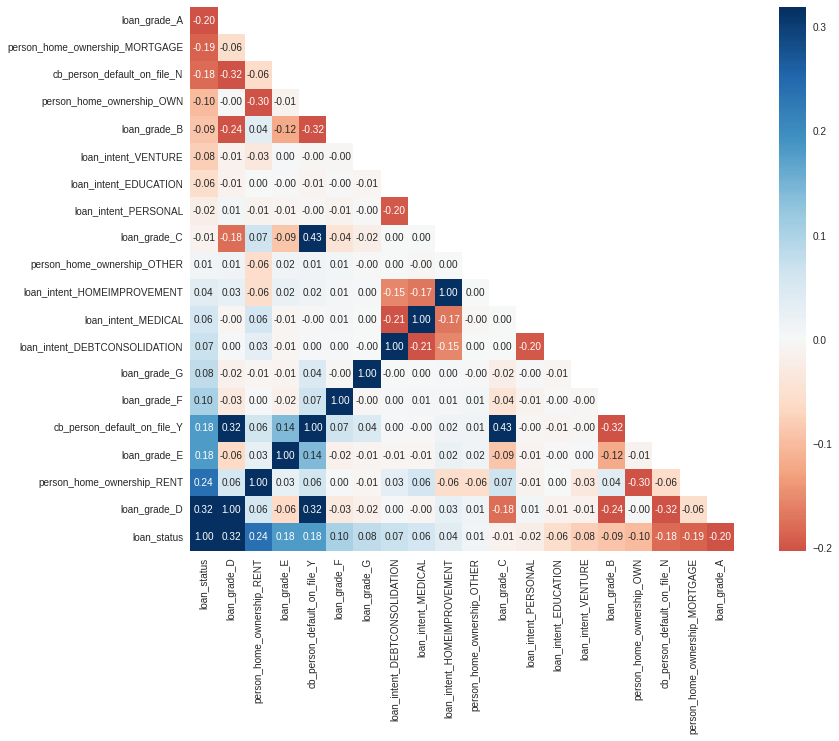

In [ ]:
# correlation between the catogorical variables
encoded_cat_cols = pd.get_dummies(char_col)
cat_cols_corr = pd.concat([encoded_cat_cols, df_clean1['loan_status']], axis=1)
corr = cat_cols_corr.corr().sort_values('loan_status', axis=1, ascending=False)
corr = corr.sort_values('loan_status', axis=0, ascending=True)
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, k=1)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(16, 10))
    ax = sns.heatmap(corr, mask=mask, vmin=corr.loan_status.min(), 
                     vmax=corr.drop(['loan_status'], axis=0).loan_status.max(), 
                     square=True, annot=True, fmt='.2f',
                     center=0, cmap='RdBu',annot_kws={"size": 10})

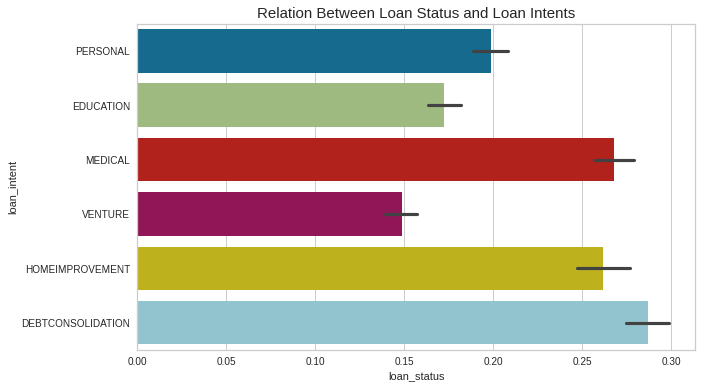

In [ ]:
#corelation between categorical variable
plt.figure(figsize=(10,6))
sns.barplot(x=df["loan_status"], y=df["loan_intent"])
plt.title("Relation Between Loan Status and Loan Intents", size=15)
plt.show()

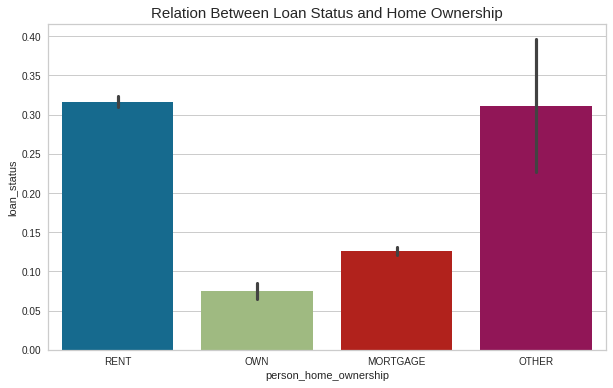

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(x=df["person_home_ownership"], y=df["loan_status"])
plt.title("Relation Between Loan Status and Home Ownership", size=15)
plt.show()

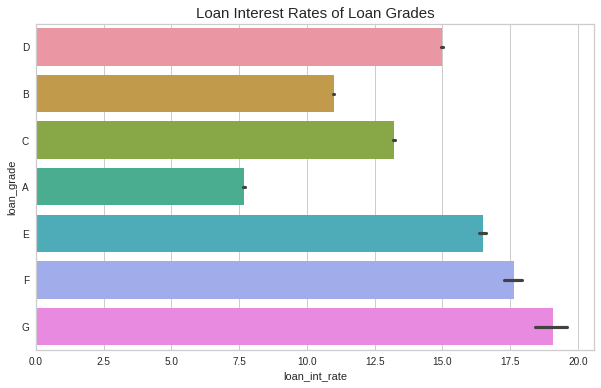

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(x=df["loan_int_rate"], y=df["loan_grade"])
plt.title("Loan Interest Rates of Loan Grades", size=15)
plt.show()

In [ ]:
pd.crosstab(df['cb_person_default_on_file'], df['loan_grade'])
#Loan grade yang paling bagus secara berurutan dari A ke G

loan_grade,A,B,C,D,E,F,G
cb_person_default_on_file,,,,,,,
N,10703,10387,3193,1747,499,129,28
Y,0,0,3245,1873,464,112,36


persentase customer yang default adalah 21,9% == 21,87%

person_income, person_emp_length, and person_age: has negative effect on loan_status being default, which means the larger these variebles, the less likely the person is risky.

loan_percent_income, loan_int_rate, and loan_amnt: has postive effect on loan_status being default, which means the larger these variebles, the more likely the person is risky.

# Split Data Train-test

In [ ]:
#split test-train data
from sklearn.model_selection import train_test_split

training_data, testing_data = train_test_split(df_clean1, test_size=0.3, random_state=25)

print(f"No. of training examples: {training_data.shape[0]}")
print(f"No. of testing examples: {testing_data.shape[0]}")

# No. of training examples: 22691
# No. of testing examples: 9725

No. of training examples: 22691
No. of testing examples: 9725


# Train and Evaluate Model


In [ ]:
from pycaret.classification import *

In [ ]:
#pycaret to determine the model
grid = setup(data= training_data, target= 'loan_status',fix_imbalance=True) #fix_imbalance will automaticaaly fix the imbalanced dataset by oversampling using the SMOTE method.

,Description,Value
0,session_id,2950
1,Target,loan_status
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(22691, 27)"
5,Missing Values,False
6,Numeric Features,26
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [ ]:
## evaluate models and compare models
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.9341,0.9317,0.7201,0.9648,0.8246,0.7851,0.7979,10.209
lightgbm,Light Gradient Boosting Machine,0.9331,0.9378,0.7175,0.9620,0.8218,0.7818,0.7946,0.366
xgboost,Extreme Gradient Boosting,0.9306,0.9386,0.7304,0.9323,0.8189,0.7767,0.7857,6.733
rf,Random Forest Classifier,0.9264,0.9159,0.7029,0.9401,0.8041,0.7600,0.7723,2.096
gbc,Gradient Boosting Classifier,0.9208,0.9170,0.7237,0.8881,0.7972,0.7486,0.7549,2.850
et,Extra Trees Classifier,0.9129,0.9050,0.6680,0.9016,0.7673,0.7152,0.7274,1.513
ada,Ada Boost Classifier,0.8834,0.8900,0.6959,0.7457,0.7196,0.6461,0.6470,0.780
dt,Decision Tree Classifier,0.8762,0.8274,0.7418,0.7007,0.7205,0.6410,0.6416,0.139
lda,Linear Discriminant Analysis,0.8514,0.8568,0.4865,0.7335,0.5848,0.4987,0.5145,0.128
ridge,Ridge Classifier,0.8513,0.0000,0.4851,0.7343,0.5839,0.4979,0.5140,0.062


In [ ]:
# report the best model
print(best)

In [ ]:
#creating model
catboost = create_model('catboost')
#hasil di train data

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9314,0.9322,0.7018,0.9717,0.8149,0.7742,0.7896
1,0.9377,0.9312,0.7485,0.9517,0.8380,0.8001,0.8089
2,0.9320,0.9296,0.7047,0.9718,0.8169,0.7765,0.7916
3,0.9314,0.9302,0.7067,0.9640,0.8156,0.7746,0.7887
4,0.9433,0.9473,0.7595,0.9700,0.8520,0.8176,0.8269
5,0.9307,0.9265,0.7097,0.9565,0.8148,0.7734,0.7864
6,0.9345,0.9390,0.7273,0.9575,0.8267,0.7872,0.7985
7,0.9345,0.9288,0.7193,0.9685,0.8255,0.7863,0.7995
8,0.9314,0.9191,0.7105,0.9605,0.8168,0.7757,0.7891
9,0.9345,0.9336,0.7135,0.9760,0.8243,0.7853,0.7998


In [ ]:
print(catboost)
#sebelum di tuning, accuracy 93,41%, prec 96,48%

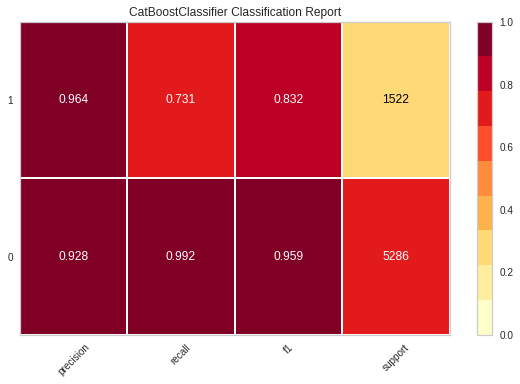

In [ ]:
# Plotting the classification report
plot_model(catboost,plot='class_report')

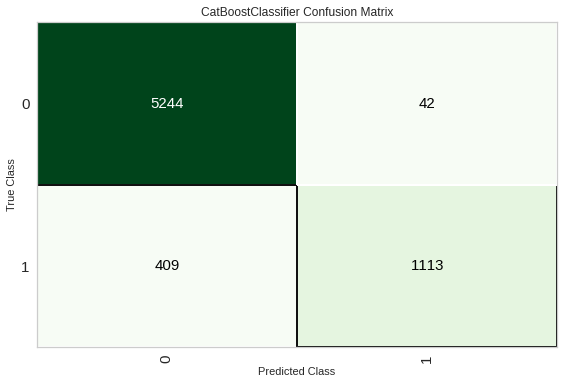

In [ ]:
# Plotting the confusion matrix
plot_model(catboost,plot='confusion_matrix')

# Hyperparameter Tuning



In [ ]:
# tune model hyperparameters
tuned_cat = tune_model(catboost)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9213,0.9161,0.6901,0.9255,0.7906,0.7434,0.7556
1,0.9283,0.9304,0.7573,0.8931,0.8196,0.7752,0.7793
2,0.9251,0.9218,0.7076,0.9272,0.8027,0.7575,0.7680
3,0.9276,0.9234,0.7097,0.9380,0.8080,0.7644,0.7757
4,0.9414,0.9374,0.7595,0.9593,0.8478,0.8121,0.8206
5,0.9270,0.9140,0.7155,0.9278,0.8079,0.7638,0.7736
6,0.9332,0.9335,0.7273,0.9502,0.8239,0.7836,0.7943
7,0.9295,0.9285,0.7251,0.9323,0.8158,0.7730,0.7824
8,0.9288,0.9123,0.7135,0.9421,0.8120,0.7691,0.7804
9,0.9282,0.9292,0.7076,0.9453,0.8094,0.7663,0.7785


In [ ]:
#evauate model yg dituning
evaluate_model(tuned_cat)
#setelah di tuning, accuracy 92,90%, prec 93,41%. malah turun. Mungkin cba pke modified method lain, karna function ini auto pke Random Grid Search method

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [ ]:
#evaluate pke model yang gk di tuning
evaluate_model(catboost)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

# Test Model

In [ ]:
#test the model
predict_model(tuned_cat)
#hasil di test data accuracy 92,91% & Precision 94,14%

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,CatBoost Classifier,0.9291,0.9269,0.728,0.9414,0.821,0.7777,0.7877


,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_Y,loan_status,Label,Score
0,28.0,80000.0,1.0,3000.0,6.540000,0.04,9.0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0.9930
1,34.0,102000.0,4.0,8400.0,17.190001,0.08,10.0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0.6868
2,28.0,138600.0,10.0,12000.0,12.990000,0.09,7.0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0.8687
3,23.0,44000.0,2.0,12000.0,10.990000,0.27,4.0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0.9049
4,25.0,52000.0,4.0,23125.0,10.740000,0.44,2.0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,1,0.9491
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6803,31.0,25200.0,0.0,1400.0,6.990000,0.06,6.0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0.8591
6804,27.0,59000.0,11.0,3000.0,7.900000,0.05,9.0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0.8987
6805,21.0,32000.0,5.0,6000.0,5.420000,0.19,4.0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0.8745
6806,22.0,62400.0,2.0,12600.0,13.850000,0.20,2.0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0.9218


In [ ]:
#test model yg gk dituning
predict_model(catboost)
#hasil di test data accuracy 93,38% & Precision 96,36%

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,CatBoost Classifier,0.9338,0.9391,0.7313,0.9636,0.8315,0.7913,0.8029


,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_Y,loan_status,Label,Score
0,28.0,80000.0,1.0,3000.0,6.540000,0.04,9.0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0.9976
1,34.0,102000.0,4.0,8400.0,17.190001,0.08,10.0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0.8164
2,28.0,138600.0,10.0,12000.0,12.990000,0.09,7.0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0.8554
3,23.0,44000.0,2.0,12000.0,10.990000,0.27,4.0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0.9883
4,25.0,52000.0,4.0,23125.0,10.740000,0.44,2.0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,1,0.9953
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6803,31.0,25200.0,0.0,1400.0,6.990000,0.06,6.0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0.8499
6804,27.0,59000.0,11.0,3000.0,7.900000,0.05,9.0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0.8358
6805,21.0,32000.0,5.0,6000.0,5.420000,0.19,4.0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0.8853
6806,22.0,62400.0,2.0,12600.0,13.850000,0.20,2.0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0.9543


In [ ]:
final_cat = finalize_model(tuned_cat)
print(final_cat)

In [ ]:
#check on test_data pke model yg dituning
unseen_predictions = predict_model(final_cat, data=testing_data)
unseen_predictions.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_N,cb_person_default_on_file_Y,Label,Score
27658,29.0,140232.0,1.0,20000.0,6.54,0,0.13,5.0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0.9924
22766,31.0,58000.0,14.5,8875.0,10.99,0,0.15,6.0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0.9789
5037,22.0,46500.0,4.0,5000.0,10.37,0,0.11,4.0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0.9501
28737,29.0,24960.0,13.0,4000.0,5.42,0,0.16,10.0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0.8465
25155,28.0,80000.0,8.0,13000.0,13.47,0,0.16,5.0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0.9071


In [ ]:
#check on test_data pke model yg gk dituning
unseen_predictions2 = predict_model(catboost, data=testing_data)
unseen_predictions2.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_N,cb_person_default_on_file_Y,Label,Score
27658,29.0,140232.0,1.0,20000.0,6.54,0,0.13,5.0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0.9979
22766,31.0,58000.0,14.5,8875.0,10.99,0,0.15,6.0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0.9976
5037,22.0,46500.0,4.0,5000.0,10.37,0,0.11,4.0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0.9923
28737,29.0,24960.0,13.0,4000.0,5.42,0,0.16,10.0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0.9304
25155,28.0,80000.0,8.0,13000.0,13.47,0,0.16,5.0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0.9060


#Intepret Model


In [ ]:
!pip install pycaret-nightly
from pycaret.utils import check_metric


     |████████████████████████████████| 313 kB 7.3 MB/s 


In [ ]:
check_metric(unseen_predictions['loan_status'], unseen_predictions['Label'], metric = 'Precision')
#menggunakan model yang dituning di dataset yang kita hold back, model perform dengan 94,62% precision

0.9462

In [ ]:
check_metric(unseen_predictions['loan_status'], unseen_predictions2['Label'], metric = 'Precision')
#menggunakan model yang gak dituning di dataset yang kita hold back, model perform dengan 96,91% precision

0.9691

In [ ]:
check_metric(unseen_predictions['loan_status'], unseen_predictions2['Label'], metric = 'Accuracy')
#menggunakan model yang gak dituning di dataset yang kita hold back, model perform dengan 93,83% accuracy

0.9383

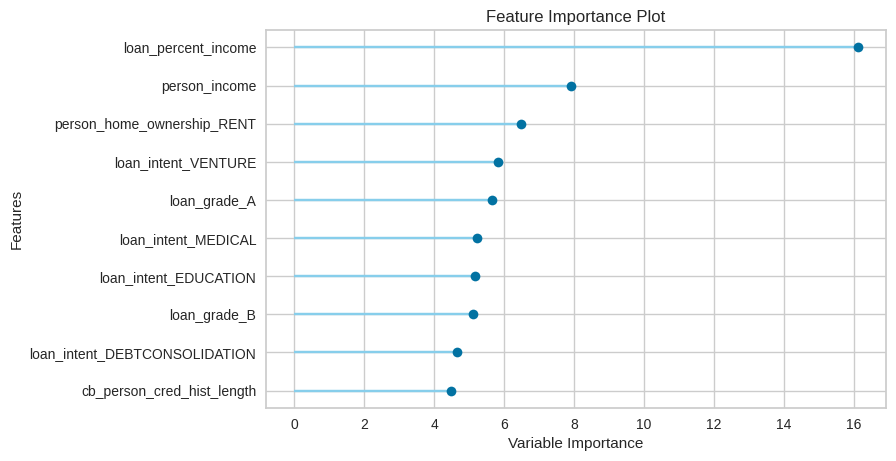

In [ ]:
# display feature and their importance
plot_model(catboost, plot = 'feature')


5 fitur paling ngaruh klo dituning
1. loan_percent_income
2. loan grade a
3. person_income
4. person home ownership_rent
5. cb_person_cred_hist_length

5 fitur paling ngaruh kalau gk dituning
1. loan_percent_income
2. person_income
3. person_home_ownership_rent
4. loan_intent_VENTURE
5. loan grafe A 

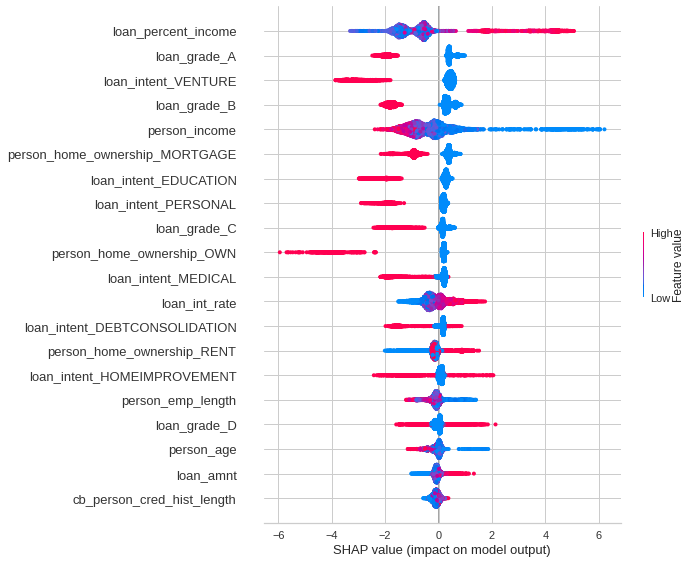

In [ ]:
interpret_model(catboost)

#save model
make summary and conclusion, also add to the ppt


In [ ]:
save_model(final_cat,'Final RF Model 22Feb2022')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[],
                                       target='loan_status', time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_...
                 ('cluster_all', 'passthrough'),
                 ('dummy', Dummify(target='loan_status')),
                 ('fix_perfect', Remove_100(target='loan_status')),
                 ('clean_names', Clean_Colum_Names()),
                 ('feature_select', 'passth